### 0. Input data

In [1]:
source('utilities.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘purrr’


The following object is masked from ‘package:mclust’:

    map


Loading required package: future



In [2]:
tz <- "US/Pacific"
train_starts = '2019-01-07'
#train_ends = '2019-09-29'
train_ends = '2019-11-10'

In [3]:
df <- read.csv("../Data/palo_alto.csv")

### 1. Sarima

In [4]:
sess <- sessions(df = df,train_starts = train_starts,train_ends = train_ends,tz = "US/Pacific")

In [5]:
#### Maybe add some sanity checks here

In [6]:
X = ts(sess$sessions,frequency=7)

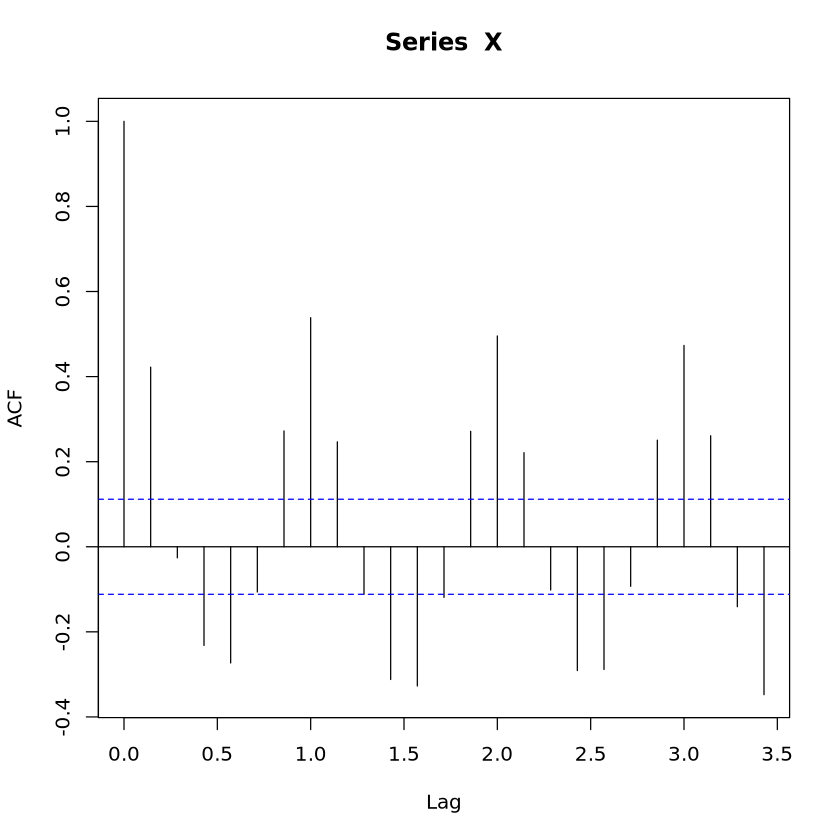

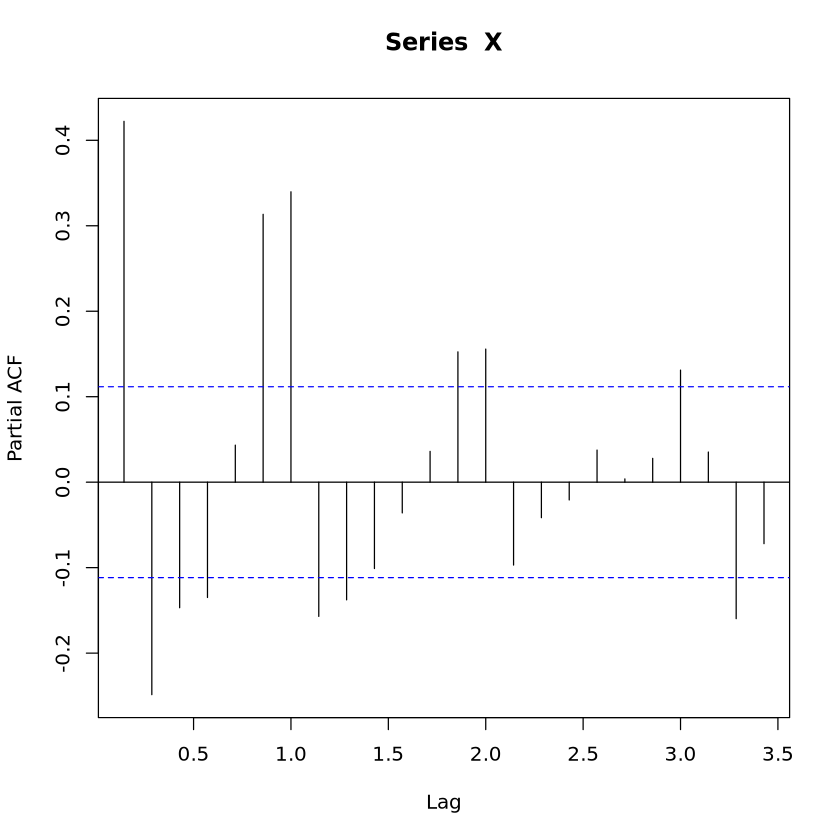

In [7]:
acf(X)
pacf(X)

In [8]:
model = auto.arima(X,xreg=sess$weekend, allowdrift = FALSE)
model

Series: X 
Regression with ARIMA(1,1,1)(0,0,1)[7] errors 

Coefficients:
         ar1      ma1    sma1      xreg
      0.3646  -0.9744  0.1306  -29.2282
s.e.  0.0569   0.0150  0.0541    2.1549

sigma^2 = 213.4:  log likelihood = -1257.96
AIC=2525.91   AICc=2526.11   BIC=2544.54

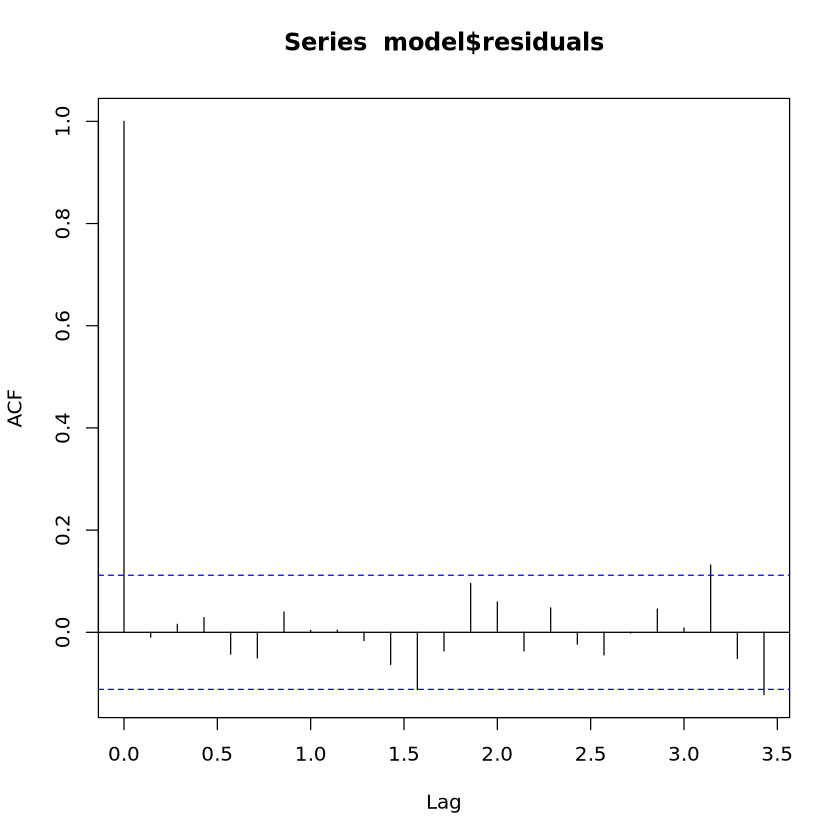

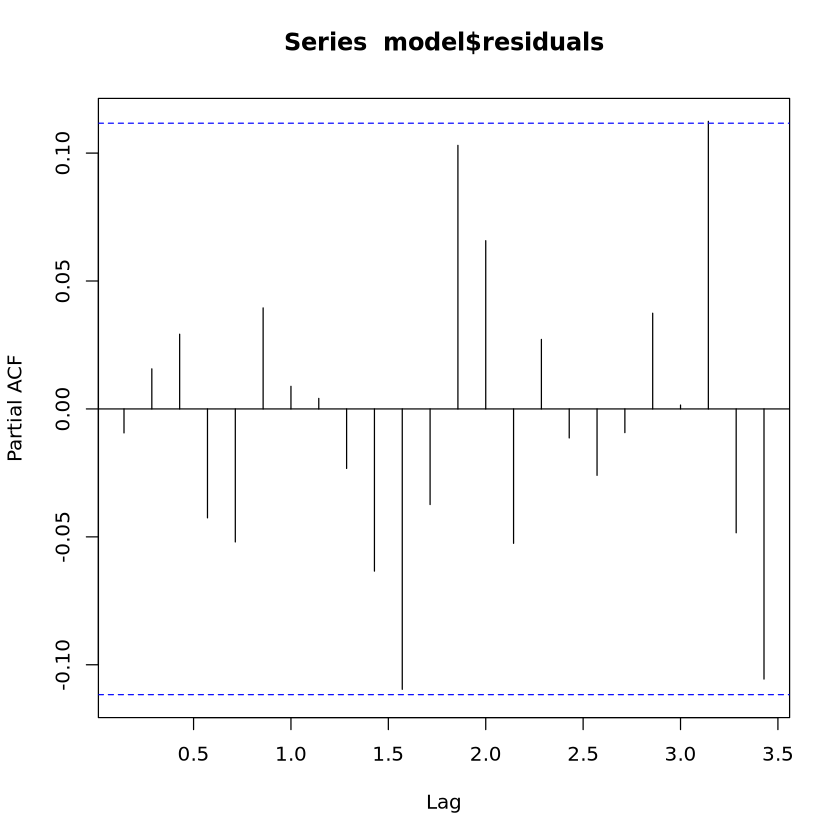

In [9]:
acf(model$residuals)
pacf(model$residuals)

### 2. GMM

In [10]:
trans <- transactions(df = df,train_starts = train_starts,train_ends = train_ends,tz = "US/Pacific")

In [12]:
gmm_models <- gmm_fit(trans,max_sample=NULL)

Time difference of 13.55556 mins


### END